In [18]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request
from adjustText import adjust_text
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.patches as mpatches

import itertools

In [19]:
comunidades={'Andalucía':8426405,
 'Aragón':1320794,
 'Asturias':1022293,
 'Cantabria':581684,
 'Ceuta':84843,
 'Castilla y Leon':2408083,
 'Castilla La Mancha':2035505,
 'Canarias':2207225,
 'Cataluña':7565099,
 'Extremadura':1065371,
 'Galicia':2700330,
 'Baleares':1187802,
 'Murcia':1487698,
 'Madrid':6640705,
 'Melilla':84714,
 'Navarra':649966,
 'País Vasco':2178048,
 'La Rioja':313582,
 'C. Valenciana':4974475}

In [40]:
pob_spain=0
for i in comunidades.keys():
    pob_spain+=comunidades[i]
comunidades['España']=pob_spain

In [41]:
path_github_completa = 'https://github.com/montera34/escovid19data/blob/master/data/original/vacunas/estado_vacunacion_etarios_pauta_completa_.csv?raw=True'
path_github_simple = 'https://github.com/montera34/escovid19data/blob/master/data/original/vacunas/estado_vacunacion_etarios_1dosis_.csv?raw=True'
path_img = '/Users/mharias/Documents/proyectos/covid/vacunacion/graficos/'
autor='@walyt'
fuente = 'https://github.com/montera34/escovid19data/blob/master/data/original/vacunas'

In [42]:
datos_raw_completa= pd.read_csv(path_github_completa)
datos_raw_una= pd.read_csv(path_github_simple)

In [43]:
hoy = datetime.today()
#hoy = datetime(year= 2021, month = 4, day=9)
hoy_str = hoy.strftime('%Y-%m-%d')
hoy_titulo = hoy.strftime('%d/%m')

In [44]:
datos_completa = datos_raw_completa.copy()
datos_completa['date_pub'] = pd.to_datetime(datos_completa['date_pub'],format='%d/%m/%y')
datos_completa = datos_completa[datos_completa['date_pub'] == hoy_str]

datos_una = datos_raw_una.copy()
datos_una['date_pub'] = pd.to_datetime(datos_una['date_pub'],format='%d/%m/%y')
datos_una = datos_una[datos_una['date_pub'] == hoy_str]


In [45]:
datos_completa

,date_pub,ccaa,Personas pauta completa >=80 años,Población INE>=80 años,%,Personas pauta completa 70-79 años,Población INE70-79 años,%.1,Personas pauta completa 60-69 años,Población INE60-69 años,...,Población INE18-24 años,%.5,16-17 años,Población INE16-17 años,%.6,Total Personas pauta completa,Total Población INE Población a Vacunar (1),% pauta completa sobre Población a Vacunar INE,source_name,source
630,2021-05-12,Andalucía,414191,413516,1.0016323431257799,401281,650381,0.6169937313666912,56884,916147,...,625846,0.023184617302019987,278,181921,0.001528135839182942,1119700,7062213,0.15854803586354588,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
631,2021-05-12,Aragón,96731,98807,0.9789893428603237,60133,118955,0.5055104871590097,16901,156367,...,89180,0.0173917918815878,28,25106,0.0011152712499004221,212832,1132764,0.18788732692776253,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
632,2021-05-12,Asturias,84780,87826,0.965317787443354,65635,109249,0.6007835311993702,12769,149652,...,54179,0.05389542073497111,35,15563,0.002248923729358093,207221,901209,0.22993667395687348,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
633,2021-05-12,Baleares,47533,49542,0.9594485487061483,40082,80516,0.49781409906105617,5780,117231,...,85839,0.016018359952935147,32,23300,0.0013733905579399143,121931,986279,0.1236272900467312,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
634,2021-05-12,Canarias,81457,90236,0.9027106697991932,80754,154531,0.5225747584627033,17008,235092,...,163899,0.016638295535665256,43,44352,0.0009695165945165945,239189,1871033,0.1278379376526229,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
635,2021-05-12,Cantabria,40100,41042,0.977047902149018,28384,53066,0.5348810914709984,4243,77345,...,34935,0.019207098897953342,5,10791,0.0004633490872022982,90800,501384,0.18109871874650965,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
636,2021-05-12,Castilla y Leon,221193,223657,0.9889831304184532,118484,245410,0.48280021189030603,36146,318575,...,144422,0.019934635997285732,97,40684,0.0023842296725985644,455402,2092873,0.2175965765720137,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
637,2021-05-12,Castilla - La Mancha,131265,135194,0.9709380593813335,65474,159101,0.41152475471555805,15347,218444,...,149518,0.026224267312296847,89,42364,0.0021008403361344537,277031,1719964,0.16106790607245267,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
638,2021-05-12,Cataluña,430065,447196,0.9616924122756018,294032,635292,0.4628296909137845,64448,837584,...,556316,0.03464937193968896,306,159864,0.0019141270079567633,1029511,6531658,0.1576186322064015,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
639,2021-05-12,C. Valenciana,281295,276531,1.0172277249205333,249747,437862,0.5703783383805857,28358,580728,...,352834,0.016322123151396976,115,103049,0.0011159739541383225,671781,4269305,0.1573513721788441,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...


In [46]:
datos_completa = datos_completa.set_index('ccaa')
datos_una = datos_una.set_index('ccaa')

In [47]:
datos_una.index

Index(['Andalucía', 'Aragón', 'Asturias ', 'Baleares', 'Canarias', 'Cantabria',
       'Castilla y Leon', 'Castilla - La Mancha', 'Cataluña', 'C. Valenciana',
       'Extremadura', 'Galicia', 'La Rioja', 'Madrid', 'Murcia', 'Navarra',
       'País Vasco', 'Ceuta', 'Melilla', 'Fuerzas Armadas', 'Total España'],
      dtype='object', name='ccaa')

In [48]:
datos_completa.index

Index(['Andalucía', 'Aragón', 'Asturias ', 'Baleares', 'Canarias', 'Cantabria',
       'Castilla y Leon', 'Castilla - La Mancha', 'Cataluña', 'C. Valenciana',
       'Extremadura', 'Galicia', 'La Rioja', 'Madrid', 'Murcia', 'Navarra',
       'País Vasco', 'Ceuta', 'Melilla', 'Fuerzas Armadas', 'Total España'],
      dtype='object', name='ccaa')

In [49]:
datos = datos_completa.join(datos_una,rsuffix='r',lsuffix='l')

In [50]:
datos.columns

Index(['date_publ', 'Personas pauta completa >=80 años',
       'Población INE>=80 añosl', '%l', 'Personas pauta completa 70-79 años',
       'Población INE70-79 añosl', '%.1l',
       'Personas pauta completa 60-69 años', 'Población INE60-69 añosl',
       '%.2l', 'Personas pauta completa 50-59 años',
       'Población INE50-59 añosl', '%.3l',
       'Personas pauta completa 25-49 años', 'Población INE25-49 añosl',
       '%.4l', '18-24 añosl', 'Población INE18-24 añosl', '%.5l',
       '16-17 añosl', 'Población INE16-17 añosl', '%.6l',
       'Total Personas pauta completa',
       'Total Población INE Población a Vacunar (1)l',
       '% pauta completa sobre Población a Vacunar INE', 'source_namel',
       'sourcel', 'date_pubr', 'Personas con al menos 1 dosis >=80 años',
       'Población INE>=80 añosr', '%r',
       'Personas con al menos 1 dosis 70-79 años', 'Población INE70-79 añosr',
       '%.1r', 'Personas con al menos 1 dosis 60-69 años',
       'Población INE60-69 añosr', '

In [31]:
datos=datos[['ccaal', 
 'Personas pauta completa >=80 años','Población INE>=80 añosl',
 'Personas pauta completa 70-79 años','Población INE70-79 añosl', 
 'Personas pauta completa 60-69 años', 'Población INE60-69 añosl',
 'Personas pauta completa 50-59 años','Población INE50-59 añosl',
 'Personas pauta completa 25-49 años', 'Población INE25-49 añosl',
 '18-24 añosl', 'Población INE18-24 añosl',
 '16-17 añosl', 'Población INE16-17 añosl',
 'Total Personas pauta completa',
 'Total Población INE Población a Vacunar (1)l',
 'Personas con al menos 1 dosis >=80 años',
 'Personas con al menos 1 dosis 70-79 años',
 'Personas con al menos 1 dosis 60-69 años',
 'Personas con al menos 1 dosis 50-59 años',
 'Personas con al menos 1 dosis 25-49 años', 
 '18-24 añosr',
 '16-17 añosr',
 'Total Personas con al menos 1 dosis',
       ]]

KeyError: "['ccaal'] not in index"

In [32]:
datos.columns

Index(['date_publ', 'Personas pauta completa >=80 años',
       'Población INE>=80 añosl', '%l', 'Personas pauta completa 70-79 años',
       'Población INE70-79 añosl', '%.1l',
       'Personas pauta completa 60-69 años', 'Población INE60-69 añosl',
       '%.2l', 'Personas pauta completa 50-59 años',
       'Población INE50-59 añosl', '%.3l',
       'Personas pauta completa 25-49 años', 'Población INE25-49 añosl',
       '%.4l', '18-24 añosl', 'Población INE18-24 añosl', '%.5l',
       '16-17 añosl', 'Población INE16-17 añosl', '%.6l',
       'Total Personas pauta completa',
       'Total Población INE Población a Vacunar (1)l',
       '% pauta completa sobre Población a Vacunar INE', 'source_namel',
       'sourcel', 'date_pubr', 'Personas con al menos 1 dosis >=80 años',
       'Población INE>=80 añosr', '%r',
       'Personas con al menos 1 dosis 70-79 años', 'Población INE70-79 añosr',
       '%.1r', 'Personas con al menos 1 dosis 60-69 años',
       'Población INE60-69 añosr', '

In [33]:
datos.columns = ['ccaa', 
                  'Pauta >=80', 'Población >=80',
                  'Pauta 70-79', 'Población 70-79',
                  'Pauta 60-69', 'Población 60-69',
                  'Pauta 50-59', 'Población 50-59',
                  'Pauta 25-49', 'Población 25-49',
                  'Pauta 18-24', 'Población 18-24',
                  'Pauta 16-17', 'Población 16-17',
                  'Pauta Total','Población a Vacunar',
                  '1 dosis >=80',
                  '1 dosis 70-79',
                  '1 dosis 60-69',
                  '1 dosis 50-59',
                  '1 dosis 25-49', 
                  '1 dosis 18-24',
                  '1 dosis 16-17', 
                  '1 dosis Total']

ValueError: Length mismatch: Expected axis has 54 elements, new values have 25 elements

In [34]:
datos = datos [['ccaa', 
                  'Pauta >=80','1 dosis >=80','Población >=80',
                  'Pauta 70-79','1 dosis 70-79','Población 70-79',
                  'Pauta 60-69','1 dosis 60-69','Población 60-69',
                  'Pauta 50-59','1 dosis 50-59','Población 50-59',
                  'Pauta 25-49','1 dosis 25-49','Población 25-49',
                  'Pauta 18-24','1 dosis 18-24','Población 18-24',
                  'Pauta 16-17','1 dosis 16-17','Población 16-17',
                  'Pauta Total','1 dosis Total','Población a Vacunar'
                  ]]

KeyError: "None of [Index(['ccaa', 'Pauta >=80', '1 dosis >=80', 'Población >=80', 'Pauta 70-79',\n       '1 dosis 70-79', 'Población 70-79', 'Pauta 60-69', '1 dosis 60-69',\n       'Población 60-69', 'Pauta 50-59', '1 dosis 50-59', 'Población 50-59',\n       'Pauta 25-49', '1 dosis 25-49', 'Población 25-49', 'Pauta 18-24',\n       '1 dosis 18-24', 'Población 18-24', 'Pauta 16-17', '1 dosis 16-17',\n       'Población 16-17', 'Pauta Total', '1 dosis Total',\n       'Población a Vacunar'],\n      dtype='object')] are in the [columns]"

In [35]:
datos = datos[datos['ccaa']!='Fuerzas Armadas']

KeyError: 'ccaa'

In [36]:
for columna in datos.columns[1:]:
    datos.loc[:,columna] = pd.to_numeric(datos.loc[:,columna])

ValueError: Unable to parse string "-" at position 19

In [37]:
pd.options.display.float_format = "{:,.2f}".format

In [38]:
tabla = pd.DataFrame()
for comunidad in datos.loc[:,'ccaa'].unique():
    ## > 80
    tabla = tabla.append({'ccaa':comunidad,
                          'rango':'>=80',
                          'variable':'% Pob',
                          'valor': datos.loc[datos['ccaa']==comunidad,'Población >=80'].values[0]/\
                          datos.loc[datos['ccaa']==comunidad,'Población a Vacunar'].values[0]
        },ignore_index=True)
    tabla = tabla.append({'ccaa':comunidad,
                          'rango':'>=80',
                          'variable':'% Vac',
                          'valor': (datos.loc[datos['ccaa']==comunidad,'Pauta >=80'].values[0]+\
                          datos.loc[datos['ccaa']==comunidad,'1 dosis >=80'].values[0])/\
                          (datos.loc[datos['ccaa']==comunidad,'Pauta Total'].values[0]+\
                          datos.loc[datos['ccaa']==comunidad,'1 dosis Total'].values[0])
        },ignore_index=True)
    
    ## 70-79
    tabla = tabla.append({'ccaa':comunidad,
                          'rango':'70-79',
                          'variable':'% Pob',
                          'valor': datos.loc[datos['ccaa']==comunidad,'Población 70-79'].values[0]/\
                          datos.loc[datos['ccaa']==comunidad,'Población a Vacunar'].values[0]
        },ignore_index=True)
    tabla = tabla.append({'ccaa':comunidad,
                          'rango':'70-79',
                          'variable':'% Vac',
                          'valor': (datos.loc[datos['ccaa']==comunidad,'Pauta 70-79'].values[0]+\
                          datos.loc[datos['ccaa']==comunidad,'1 dosis 70-79'].values[0])/\
                          (datos.loc[datos['ccaa']==comunidad,'Pauta Total'].values[0]+\
                          datos.loc[datos['ccaa']==comunidad,'1 dosis Total'].values[0])
        },ignore_index=True)
    ##60-69
    tabla = tabla.append({'ccaa':comunidad,
                          'rango':'60-69',
                          'variable':'% Pob',
                          'valor': datos.loc[datos['ccaa']==comunidad,'Población 60-69'].values[0]/\
                          datos.loc[datos['ccaa']==comunidad,'Población a Vacunar'].values[0]
        },ignore_index=True)
    tabla = tabla.append({'ccaa':comunidad,
                          'rango':'60-69',
                          'variable':'% Vac',
                          'valor': (datos.loc[datos['ccaa']==comunidad,'Pauta 60-69'].values[0]+\
                          datos.loc[datos['ccaa']==comunidad,'1 dosis 60-69'].values[0])/\
                          (datos.loc[datos['ccaa']==comunidad,'Pauta Total'].values[0]+\
                          datos.loc[datos['ccaa']==comunidad,'1 dosis Total'].values[0])
        },ignore_index=True)
    ##50-59
    tabla = tabla.append({'ccaa':comunidad,
                          'rango':'50-59',
                          'variable':'% Pob',
                          'valor': datos.loc[datos['ccaa']==comunidad,'Población 50-59'].values[0]/\
                          datos.loc[datos['ccaa']==comunidad,'Población a Vacunar'].values[0]
        },ignore_index=True)
    tabla = tabla.append({'ccaa':comunidad,
                          'rango':'50-59',
                          'variable':'% Vac',
                          'valor': (datos.loc[datos['ccaa']==comunidad,'Pauta 50-59'].values[0]+\
                          datos.loc[datos['ccaa']==comunidad,'1 dosis 50-59'].values[0])/\
                          (datos.loc[datos['ccaa']==comunidad,'Pauta Total'].values[0]+\
                          datos.loc[datos['ccaa']==comunidad,'1 dosis Total'].values[0])
        },ignore_index=True)
    
    ##25-49
    tabla = tabla.append({'ccaa':comunidad,
                          'rango':'25-49',
                          'variable':'% Pob',
                          'valor': datos.loc[datos['ccaa']==comunidad,'Población 25-49'].values[0]/\
                          datos.loc[datos['ccaa']==comunidad,'Población a Vacunar'].values[0]
        },ignore_index=True)
    tabla = tabla.append({'ccaa':comunidad,
                          'rango':'25-49',
                          'variable':'% Vac',
                          'valor': (datos.loc[datos['ccaa']==comunidad,'Pauta 25-49'].values[0]+\
                          datos.loc[datos['ccaa']==comunidad,'1 dosis 25-49'].values[0])/\
                          (datos.loc[datos['ccaa']==comunidad,'Pauta Total'].values[0]+\
                          datos.loc[datos['ccaa']==comunidad,'1 dosis Total'].values[0])
        },ignore_index=True)
                         
    ##24-18               
    tabla = tabla.append({'ccaa':comunidad,
                          'rango':'18-24',
                          'variable':'% Pob',
                          'valor': datos.loc[datos['ccaa']==comunidad,'Población 18-24'].values[0]/datos.loc[datos['ccaa']==comunidad,'Población a Vacunar'].values[0]
        },ignore_index=True)
    tabla = tabla.append({'ccaa':comunidad,
                          'rango':'18-24',
                          'variable':'% Vac',
                          'valor': (datos.loc[datos['ccaa']==comunidad,'Pauta 18-24'].values[0]+\
                          datos.loc[datos['ccaa']==comunidad,'1 dosis 18-24'].values[0])/\
                          (datos.loc[datos['ccaa']==comunidad,'Pauta Total'].values[0]+\
                          datos.loc[datos['ccaa']==comunidad,'1 dosis Total'].values[0])
        },ignore_index=True)
                         
    ##16-17
    tabla = tabla.append({'ccaa':comunidad,
                          'rango':'16-17',
                          'variable':'% Pob',
                          'valor': datos.loc[datos['ccaa']==comunidad,'Población 16-17'].values[0]/datos.loc[datos['ccaa']==comunidad,'Población a Vacunar'].values[0]
        },ignore_index=True)
    tabla = tabla.append({'ccaa':comunidad,
                          'rango':'16-17',
                          'variable':'% Vac',
                          'valor': (datos.loc[datos['ccaa']==comunidad,'Pauta 16-17'].values[0]+\
                          datos.loc[datos['ccaa']==comunidad,'1 dosis 16-17'].values[0])/\
                          (datos.loc[datos['ccaa']==comunidad,'Pauta Total'].values[0]+\
                          datos.loc[datos['ccaa']==comunidad,'1 dosis Total'].values[0])
        },ignore_index=True)                    
tabla = tabla[['ccaa','rango','variable','valor']]


KeyError: 'ccaa'

In [52]:
tabla

,ccaa,rango,variable,valor
0,Andalucía,>=80,% Pob,0.06
1,Andalucía,>=80,% Vac,0.33
2,Andalucía,70-79,% Pob,0.09
3,Andalucía,70-79,% Vac,0.17
4,Andalucía,60-69,% Pob,0.13
...,...,...,...,...
275,Total España,25-49,% Vac,0.21
276,Total España,18-24,% Pob,0.08
277,Total España,18-24,% Vac,0.02
278,Total España,16-17,% Pob,0.02


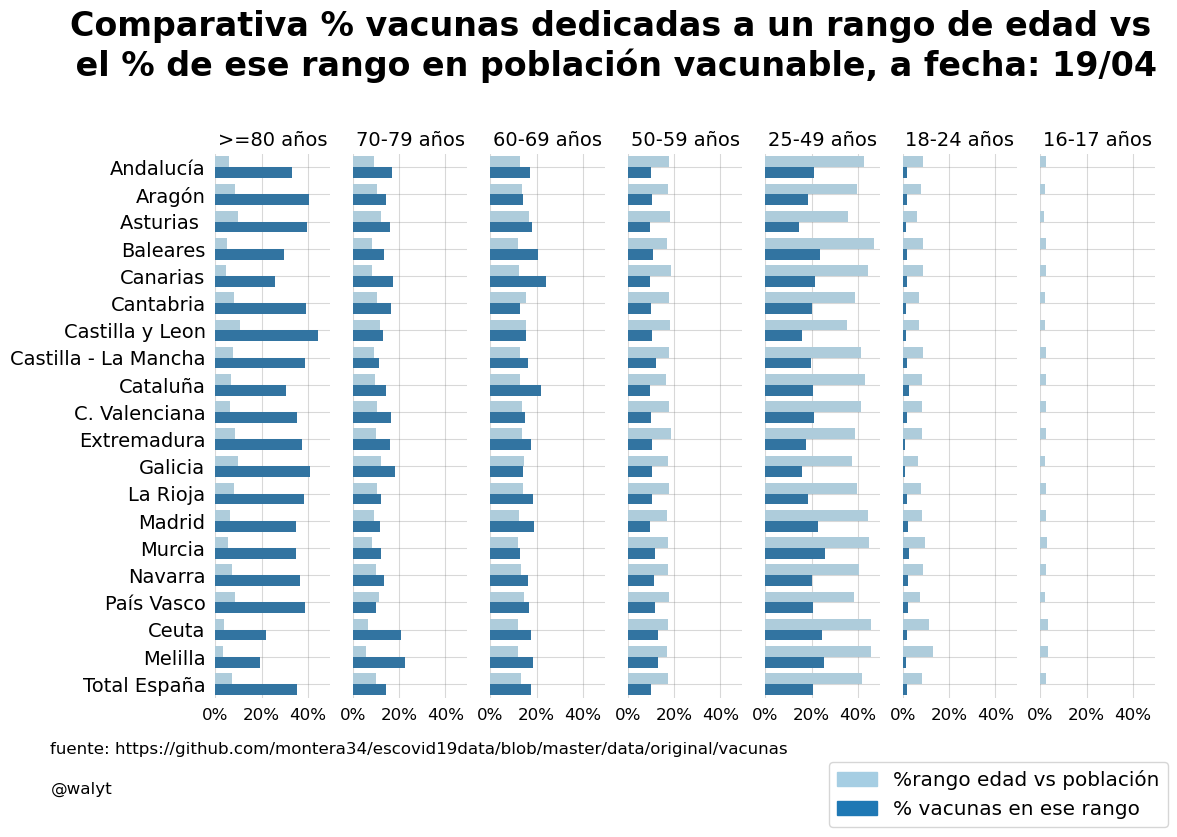

In [57]:
n_cols = 7
color_ejes = 'black'
color_titulos = 'black'
color_total='black'
color_covid='red'
plt.rcdefaults()
sns.plotting_context('paper', font_scale = 1.3)
#plt.xkcd()

g = sns.FacetGrid(tabla,col='rango',aspect=.2, col_wrap=n_cols,
                      margin_titles=True,height=8,sharey=True,sharex=True)
#g.map_dataframe(sns.scatterplot, x="valor", y="ccaa",hue='variable',s=100,alpha=1)
g.map_dataframe(sns.barplot, x="valor", y="ccaa",alpha=1,palette='Paired',hue='variable',dodge=True).\
set_titles(row_template="{row_name}", col_template="{col_name} años",size=14)
#           bbox_to_anchor=(1.2, -.2),fontsize='x-large')
# Título

titulo = 'Comparativa % vacunas dedicadas a un rango de edad vs\n el % de ese rango en población vacunable, a fecha: {}'.format(hoy_titulo)


for ax in g.axes.flat:
    
    
    ax.yaxis.set_tick_params(labelsize=14,width=0,labelcolor=color_ejes)
    #a1.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.xaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_ejes,rotation=0)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x,v:'{:0.0%}'.format(x)))
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    ax.grid(True,axis='both',which='both',color='grey',alpha=.3)
    ax.set_axisbelow(True)

#g.set_titles(row_template="{row_name}", col_template="{col_name}",size=18)


patch_vacunas = mpatches.Patch(color=sns.color_palette("Paired")[0], label='%rango edad vs población')
patch_pob = mpatches.Patch(color=sns.color_palette("Paired")[1], label='% vacunas en ese rango')
plt.legend(handles=[patch_vacunas,patch_pob],bbox_to_anchor=(1.2, -0.1),fontsize='x-large')

#plt.legend(labels=['% rango edad vs población','% vacunas en ese rango'],loc='lower right',
#           bbox_to_anchor=(1.2, -.2),fontsize='x-large')
g.despine(bottom=True, left=True)
g.fig.text(x=0.0,y=.05,s='fuente: '+fuente,color=color_titulos,fontsize=12,ha='left')
g.fig.text(x=0.0,y=.0,s=autor,color=color_titulos,fontsize=12)
g.fig.suptitle('{}'.format(titulo),fontsize=24,color=color_titulos,weight='bold')
g.fig.subplots_adjust(top=.8,bottom=.12,wspace=0.2,hspace=0.2)

plt.savefig(path_img+'comparativa_pob_vac.png',dpi=288,bbox_inches='tight')  

plt.show()


TypeError: grafica() missing 1 required positional argument: 'label'

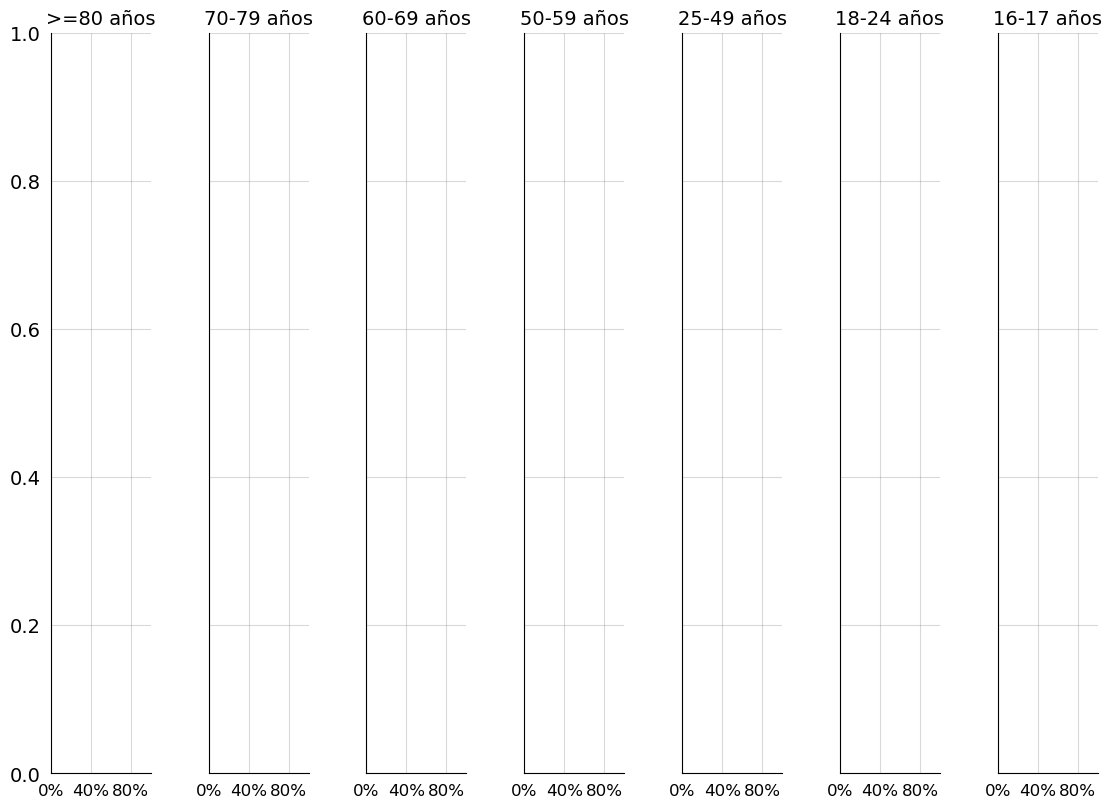

In [56]:
n_cols = 7
color_ejes = 'black'
color_titulos = 'black'
color_total='black'
color_covid='red'
plt.rcdefaults()
sns.plotting_context('paper', font_scale = 1.3)
#plt.xkcd()

g = sns.FacetGrid(tabla,col='rango',aspect=.2, col_wrap=n_cols,
                      margin_titles=True,height=8,sharey=True,sharex=True)
#g.map_dataframe(sns.scatterplot, x="valor", y="ccaa",hue='variable',s=100,alpha=1)
#g.map_dataframe(sns.barplot, x="valor", y="ccaa",alpha=1,palette='Paired',hue='variable').\
g.set_titles(row_template="{row_name}", col_template="{col_name} años",size=14)
#           bbox_to_anchor=(1.2, -.2),fontsize='x-large')
# Título

titulo = 'Comparativa % vacunas dedicadas a un rango de edad vs\n el % de ese rango en población vacunable, a fecha: {}'.format(hoy_titulo)

def grafica(x, color, label):
    ax1 = plt.gca()
    ax1.xaxis_date()
    df_datos = tabla.loc[tabla['rango'] == label]
   
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    
    ax1.plot(df_datos['fecha'], df_datos['%CamasCovid'],lw=1,color=color_covid,label='A',kind='bar',)
    ax1.plot(df_datos['fecha'], df_datos['%CamasUCI'], lw=1, color=color_uci,label='B')
    



for ax in g.axes.flat:
    
    
    ax.yaxis.set_tick_params(labelsize=14,width=0,labelcolor=color_ejes)
    #a1.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.xaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_ejes,rotation=0)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x,v:'{:0.0%}'.format(x)))
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    ax.grid(True,axis='both',which='both',color='grey',alpha=.3)
    ax.set_axisbelow(True)

#g.set_titles(row_template="{row_name}", col_template="{col_name}",size=18)
g.map(grafica,'rango')

patch_vacunas = mpatches.Patch(color=sns.color_palette("Paired")[0], label='%rango edad vs población')
patch_pob = mpatches.Patch(color=sns.color_palette("Paired")[1], label='% vacunas en ese rango')
plt.legend(handles=[patch_vacunas,patch_pob],bbox_to_anchor=(1.2, -0.1),fontsize='x-large')

#plt.legend(labels=['% rango edad vs población','% vacunas en ese rango'],loc='lower right',
#           bbox_to_anchor=(1.2, -.2),fontsize='x-large')
g.despine(bottom=True, left=True)
g.fig.text(x=0.0,y=.05,s='fuente: '+fuente,color=color_titulos,fontsize=12,ha='left')
g.fig.text(x=0.0,y=.0,s=autor,color=color_titulos,fontsize=12)
g.fig.suptitle('{}'.format(titulo),fontsize=24,color=color_titulos,weight='bold')
g.fig.subplots_adjust(top=.8,bottom=.12,wspace=0.2,hspace=0.2)

plt.savefig(path_img+'comparativa_pob_vac.png',dpi=288,bbox_inches='tight')  

plt.show()


In [ ]:
tabla